# MLP Classification with Different Configurations

In [11]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

### Create the Classification Data Sets

In [2]:
data_sets = []
colors = {0: 'r', 1: 'b'}

In [3]:
d = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
moons = pd.DataFrame(d[0])
moons.columns = ['x', 'y']
moons['t'] = d[1]

In [4]:
d, t = sklearn.datasets.make_classification(
        n_samples=500,
        n_features=2,
        n_redundant=0)
classif = pd.DataFrame(d)
classif.columns = ['x', 'y']
classif['t'] = t

In [5]:
d, t = sklearn.datasets.make_circles(
        n_samples=500,
        noise=0.1,
        factor=0.7)
circles = pd.DataFrame(d)
circles.columns = ['x', 'y']
circles['t'] = t

In [6]:
data_sets = [
     classif,
     moons,
     circles
]

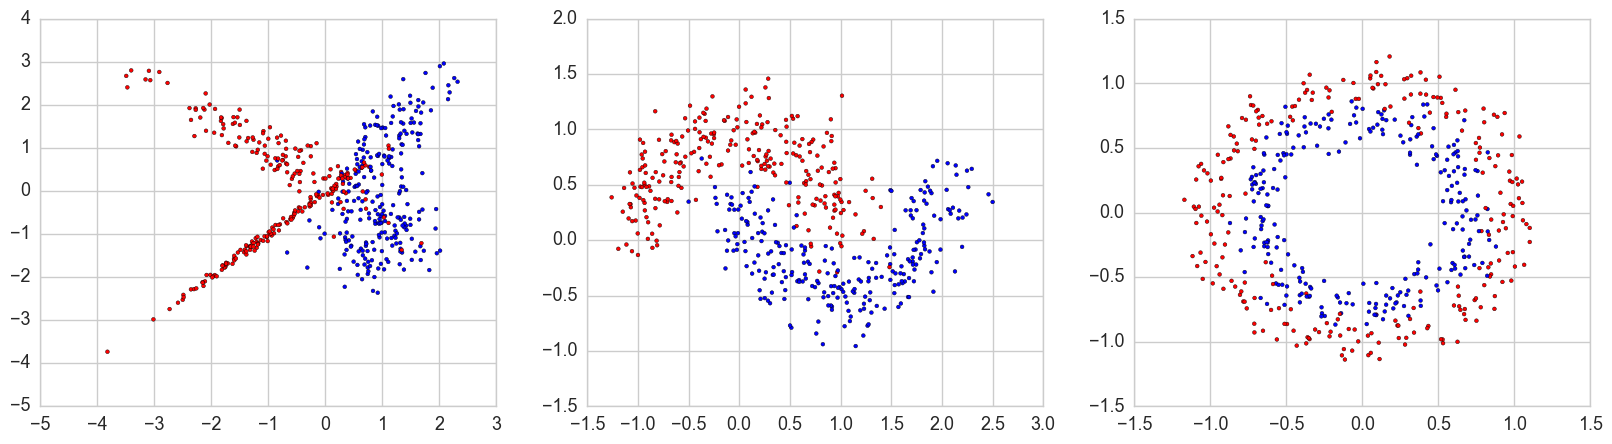

In [7]:
_ = plt.figure(figsize=(20, 5))
for i in range(3):
    _ = plt.subplot(1, 3, i+1)
    _ = plt.scatter(data_sets[i].x, data_sets[i].y, c=data_sets[i].t.map(colors), marker='o', s=dotsize/2.0)

### Classifying the Data Sets with Different MLP Configurations

In [8]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [9]:
layer_configs = [
    (2,),
    (4,),
    (8,),
    (2, 2),
    (4, 4),
    (8, 8),
    (2, 2, 2),
    (4, 4, 4),
    (8, 8, 8)
]

/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


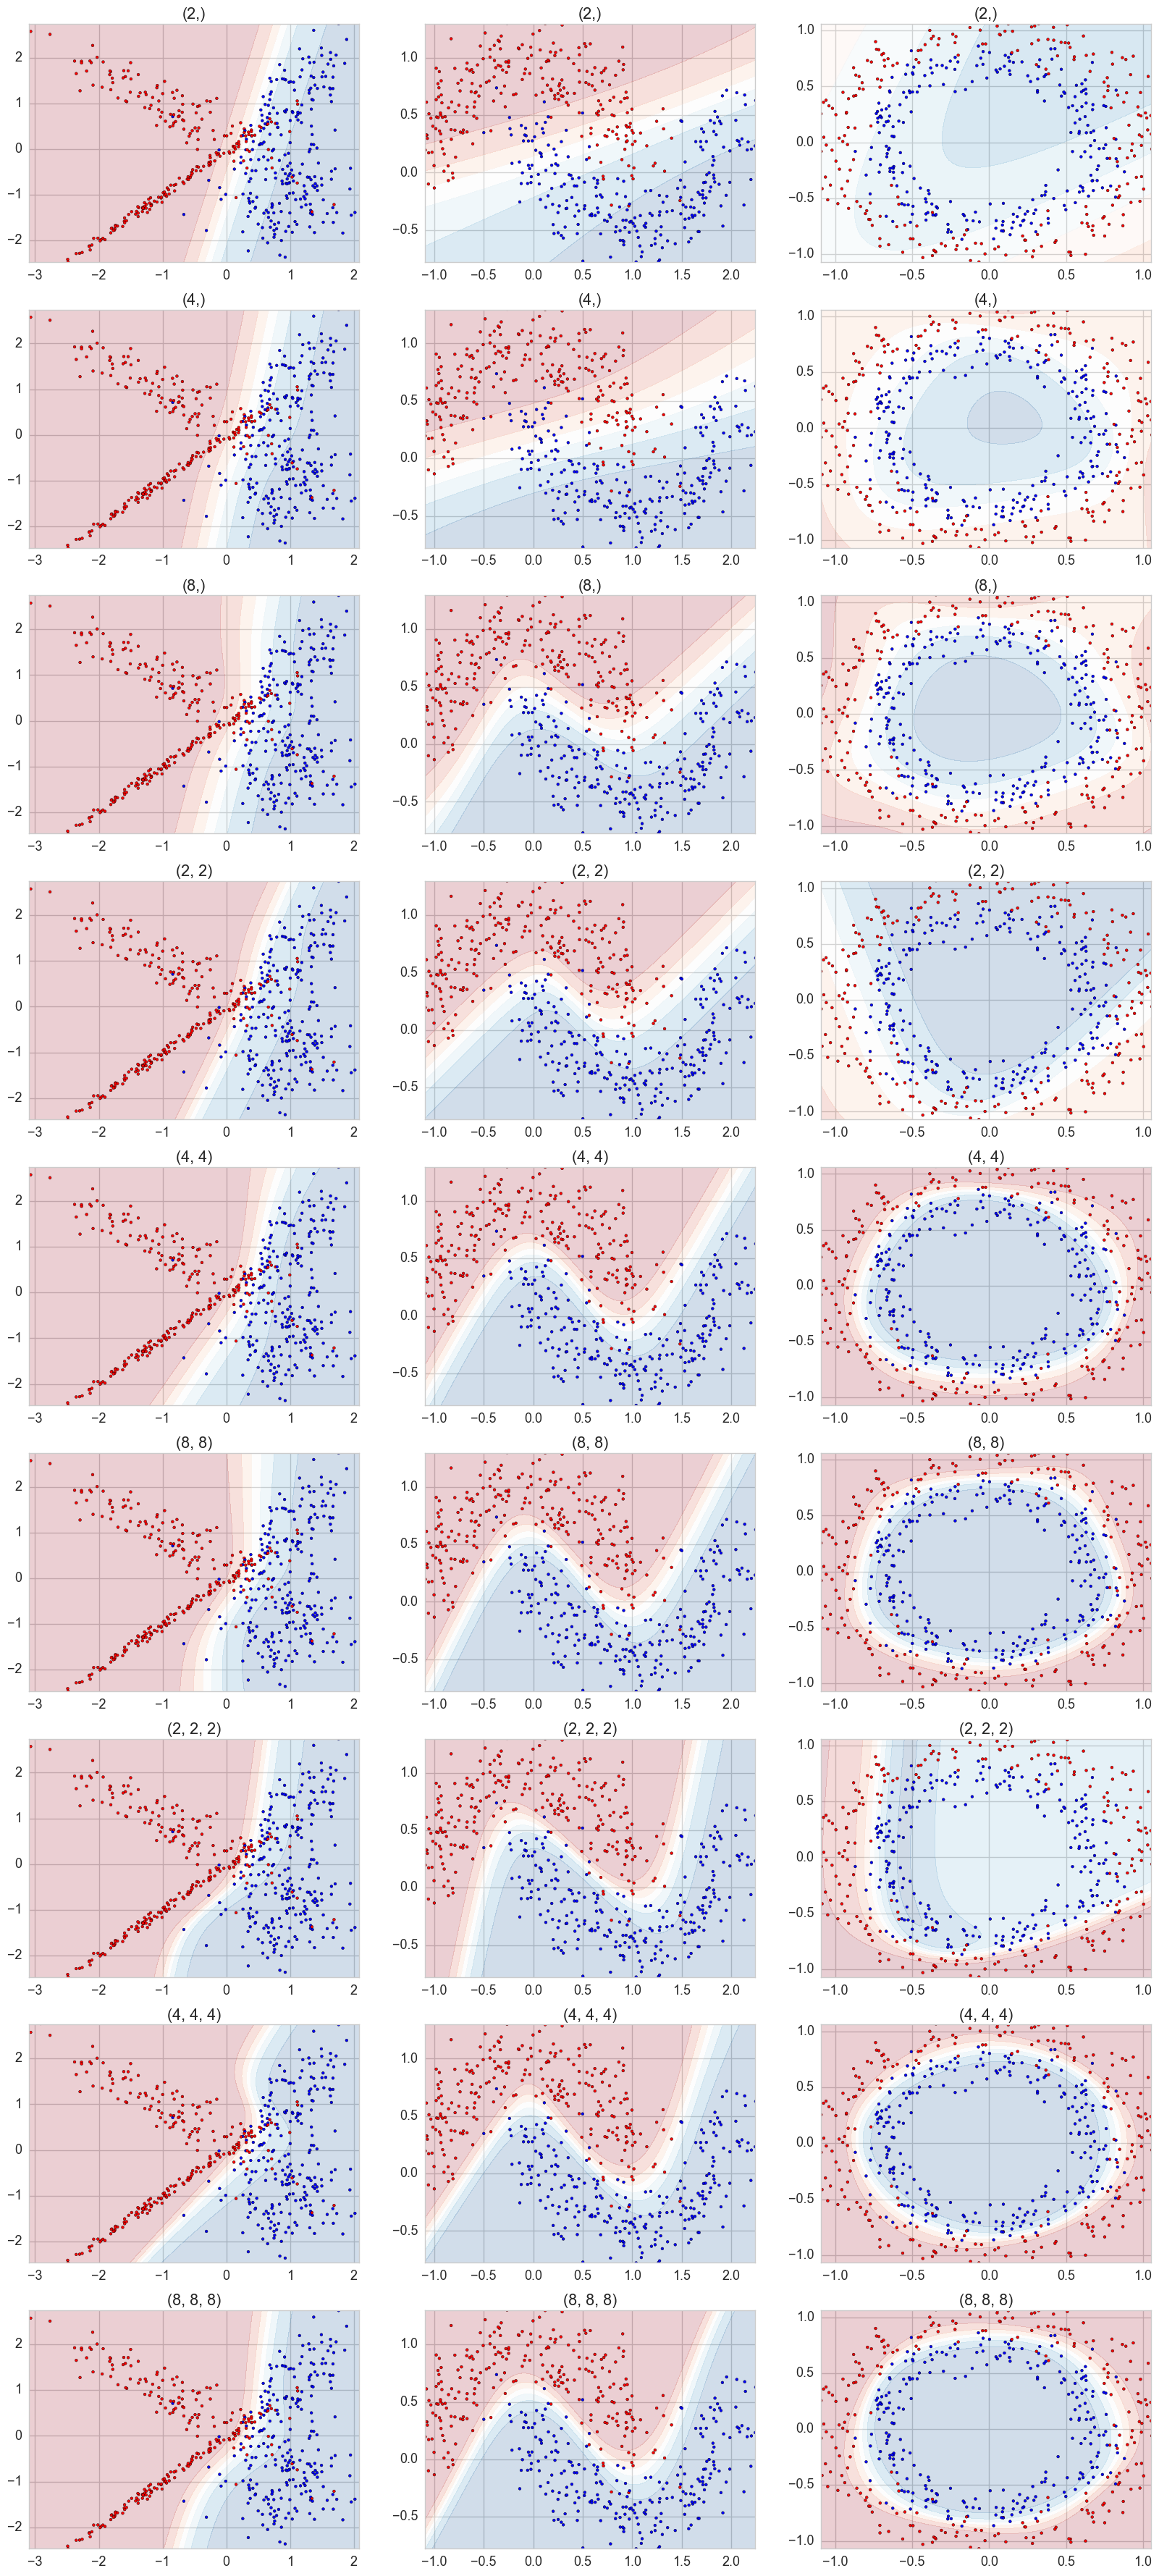

In [10]:
_ = plt.figure(figsize=(20, 5*len(layer_configs)))

for i in range(len(layer_configs)):
    
    for j in range(len(data_sets)):
    
        best_pred = None
        best_score = None
        best_model = None

        for k in range(20):
            m = sklearn.neural_network.MLPClassifier(
                    hidden_layer_sizes=layer_configs[i],
                    activation='tanh',
                    max_iter=1000,
                    random_state=k)

            m.fit(data_sets[j][['x', 'y']], data_sets[j].t)

            pred = m.predict(data_sets[j][['x', 'y']])

            score = sklearn.metrics.roc_auc_score(data_sets[j].t, pred)

            if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score
                best_model = m

        ax = plt.subplot(len(layer_configs), 3, i*len(data_sets) + j + 1)

        Z = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

        _ = plt.scatter(data_sets[j].x, data_sets[j].y, c=data_sets[j].t.map(colors), marker='o', s=dotsize/2.0)
        _ = plt.xlim((data_sets[j].x.quantile(0.01), data_sets[j].x.quantile(0.99)))
        _ = plt.ylim((data_sets[j].y.quantile(0.01), data_sets[j].y.quantile(0.99)))
        _ = plt.title(layer_configs[i])